# Homework 2: Convolutions and Spike Trains
## Due: Tuesday, December 17, 11:59pm

## Part 1: Convolutions

### Math Exercises - Convolutions

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (Convolutions and Filters).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Convolving Two Arrays

Given two arrays, $A = [3, 4, 5, 6, 2]$ and $B = [1, 2, 3]$, perform the regular convolution of these arrays. Provide a detailed step-by-step calculation and explain how the convolution changes the characteristics of the original arrays. What is the significance of convolution in signal processing, especially in the context of neural data analysis?

calculate each element of the convolved vector separately:

$ for \;\; n=0: \;\;  y_0 = A_0 \cdot B_0 = 3 \cdot 1 = 3 $ <br>
$ for \;\; n=1: \;\;  y_1 = A_0 \cdot B_1 + A_1 \cdot B_0 = 3 \cdot 2 + 4 \cdot 1 = 6+4 = 10 $ <br>
$ for \;\; n=2: \;\;  y_2 = A_0 \cdot B_2 + A_1 \cdot B_1 + A_2 \cdot B_0 = 3 \cdot 3 + 4 \cdot 2 + 5 \cdot 1 = 9 + 8 + 5 = 22 $ <br>
$ for \;\; n=3: \;\;  y_3 = A_1 \cdot B_2 + A_2 \cdot B_1 + A_3 \cdot B_0 = 4 \cdot 3 + 5 \cdot 2 + 6 \cdot 1 = 12 + 10 + 6 = 28 $ <br>
$ for \;\; n=4: \;\;  y_4 = A_2 \cdot B_2 + A_3 \cdot B_1 + A_4 \cdot B_0 = 5 \cdot 3 + 6 \cdot 2 + 2 \cdot 1 = 15 + 12 + 2 = 29 $ <br>
$ for \;\; n=5: \;\;  y_5 = A_3 \cdot B_2 + A_4 \cdot B_1 = 6 \cdot 3 + 2 \cdot 2 = 18 + 4 = 22 $ <br>
$ for \;\; n=6: \;\;  y_6 = A_4 \cdot B_2 = 2 \cdot 3 = 6 $ <br>

so the convolved vector is:
$$ y = [3, 10, 22, 28, 29, 22, 6] $$ <br>


How the convolution changes the characteristics of the original arrays: <br>
The convolution operation combines the characteristics of both signals. In this case, array B modifies array A by applying a weighted sum of the elements in the region where they overlap.

 The significance of convolution in signal processing, especially in the context of neural data analysis: <br>
 In signal processing, convolution is used for filtering, feature extraction, and noise reduction. It helps modify signals or detect important patterns by applying a filter over data. In neural data analysis, convolution is crucial for analyzing brain signals (e.g., EEG, fMRI) by enhancing relevant features or removing noise.


### Convolving Two Signals with an FFT

Consider two discrete-time signals, $X[n]$ and $Y[n]$, each with a length of 1000 points. Write an expression for convolving these signals using the Fast Fourier Transform (FFT) method. Compare the computational complexity of this method with the direct convolution method. Why is FFT-based convolution particularly beneficial in the context of processing large neural datasets?

The convolution product would be of length $2n-1 = len(X) + len(Y) - 1 $ <br>

First we zero pad the signals to length $2n-1$: <br>
$$ X = pad(X, 2n-1) \;\;\; , \;\;\; Y = pad(Y, 2n-1) $$ <br>

Perform FFT on each of the signals:<br>
$$ X_{FFT} = FFT(X) \;\;\; , \;\;\; Y_{FFT} = FFT(Y) $$ <br>

Multiply in the frequency domain:<br>
$$ Z_{FFT} = X_{FFT} \cdot Y_{FFT} $$ <br>

Inverse FFT: <br>
$$ Z[n] = FFT^{-1}(Z_{FFT}) $$ <br>


Direct convolution has complexity of $ O(N^2) $ while FFT-based convolution has complexity of $ O(Nlog(N)) $

It is beneficial in the context of large neural datasets since as the data size increases, the smaller complexity of the FFT based method becomes more efficient.

### Moving Average Filter

You have a signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$. Calculate the moving average of this signal using a Finite Impulse Response (FIR) filter with a window size of 3. Show your calculations in detail. Discuss the effect of the moving average filter on the signal, particularly in terms of smoothing and latency. How does this apply to neural signal processing?

3-point moving average filter definition: <br>
$$ Output_i = \frac{S_{i-1} + S_i + S_{i+1}}{3} $$ <br><br>

for $i=1:$ <br>
$$ Output_1 = \frac{S_0 + S_1 + S_2}{3} = \frac{2 + 3 + 4}{3} = 3 $$ <br>
for $i=2:$ <br>
$$ Output_2 = \frac{S_1 + S_2 + S_3}{3} = \frac{3 + 4 + 5}{3} = 4 $$ <br>
for $i=3:$ <br>
$$ Output_3 = \frac{S_2 + S_3 + S_4}{3} = \frac{4 + 5 + 6}{3} = 5 $$ <br>
for $i=4:$ <br>
$$ Output_4 = \frac{S_3 + S_4 + S_5}{3} = \frac{5 + 6 + 7}{3} = 6 $$ <br>
for $i=5:$ <br>
$$ Output_5 = \frac{S_4 + S_5 + S_6}{3} = \frac{6 + 7 + 8}{3} = 7 $$ <br>
for $i=6:$ <br>
$$ Output_6 = \frac{S_5 + S_6 + S_7}{3} = \frac{7 + 8 + 9}{3} = 8 $$ <br>
for $i=7:$ <br>
$$ Output_7 = \frac{S_6 + S_7 + S_8}{3} = \frac{8 + 9 + 10}{3} = 9 $$ <br>

so $$ Output = [3, 4, 5, 6, 7, 8, 9] $$ <br><br>


A moving average filter smooths a signal by averaging adjacent data points, reducing noise and fluctuations. This results in a smoother signal, which is particularly useful for removing high-frequency noise and highlighting underlying trends.

The filter introduces latency because each output depends on a window of previous data points, leading to a delay in reflecting changes in the signal. For example, in a 3-point moving average, the output for each point is delayed by two steps.

In neural signal processing, the moving average filter helps reduce noise in signals while maintaining important low-frequency components. However, the latency can be problematic for real-time applications where immediate feedback is crucial.

### Programming Exercises

In the following cells, you will write python code to manipulate and analyze an EEG signal, in order to gain insights about what is contained in the signal.

You are provided with 10 EEG recordings containing an ERP. These 10 recordings are in the file named "eeg_signals.pkl". You are also provided with a file called "erp_timestamps.txt", which contain the timestamps for the ERPs in the 10 signals.

You are also provided with an 11th EEG recording, in which you will try to locate the ERP. No timestamp is provided for this recording. This recording is saved in the file called "eeg_signal_to_analyze.pkl".

### Utilize the Convolution Operator From Standard Libraries
Show using Python's `numpy.convolve`
that convolution is a commutative operator.

In [83]:
import numpy as np

x = np.array(range(1,9))
y = np.array([1, 3])

convolution_xy = np.convolve(x, y, mode='full') # x*y
convolution_yx = np.convolve(y, x, mode='full') # y*x

print("Convolution of x and y (x * y):")
print(convolution_xy)

print("\nConvolution of y and x (y * x):")
print(convolution_yx)

# check for equality
if np.array_equal(convolution_xy, convolution_yx):
    print("\nConvolution is commutative: x * y == y * x")
else:
    print("\nConvolution is not commutative")


Convolution of x and y (x * y):
[ 1  5  9 13 17 21 25 29 24]

Convolution of y and x (y * x):
[ 1  5  9 13 17 21 25 29 24]

Convolution is commutative: x * y == y * x


### Write Your Own Convolution Function
Convolve these two signals first with the mentioned functions, and then with your
own code. Write a function that convolves two signals without using any external libraries' built-in convolution function (more general functions such as `np.dot` are permissable).

`x = [1 5 7 9 3 3 3 9 8] ; y = [1 3]`

The convolution should be done in the 'full' mode, meaning that all possible
multiplications of these signals should occur. Remember, The definition of
convolution is: $(x*y)[n] = \sum_{n \in \mathbb{Z}}{x[m] y[m-n]}$. Additionaly,
take note that Matlab flips the second vector that enters the `conv`
function.

In [84]:
# convolve with numpy
import numpy as np

x = np.array([1, 5, 7, 9, 3, 3, 3, 9, 8])
y = np.array([1, 3])

np_convolution = np.convolve(x, y, mode='full')
print("Convolution using numpy.convolve:")
print(np_convolution)



# manual convolution implementation

def manual_convolution(x, y):

    # flipping the second signal gave me a result different from numpy's,
    # so I assume that numpy doesn't flip it the way matlab does?
    #y = y[::-1]

    output_len = len(x) + len(y) - 1
    output = np.zeros(output_len)

    # perform convolution
    for n in range(output_len):
        sum_product = 0
        for m in range(len(y)):
            # check if the index is valid in the range of x
            if 0 <= n - m < len(x):
                sum_product += x[n - m] * y[m]
            else:
                # when out of bounds, treat as zero-padding
                sum_product += 0
        output[n] = sum_product

    return output



manual_result = manual_convolution(x, y)
print("Convolution Result (Manual):")
print(manual_result)

# check if both results are equal
if np.array_equal(np_convolution, manual_result):
    print("\nBoth methods give the same result!")
else:
    print("\nThe results are different.")


Convolution using numpy.convolve:
[ 1  8 22 30 30 12 12 18 35 24]
Convolution Result (Manual):
[ 1.  8. 22. 30. 30. 12. 12. 18. 35. 24.]

Both methods give the same result!


<a id="question-5"></a>
### Loading the Data

Write a script to load the 10 EEG recordings located in the "eeg_signals.pkl" file. Once loaded, create visualizations for all the recordings in both the time and frequency domains. Discuss any notable features you observe in these domains. How do these visualizations help in understanding the EEG recordings?

In [85]:
# open pkl file from path

import pickle
import matplotlib.pyplot as plt
import numpy as np

path_str = "eeg_signals.pkl"

# load the data from the pickle file
with open(path_str, 'rb') as f:
  eeg_data = pickle.load(f)

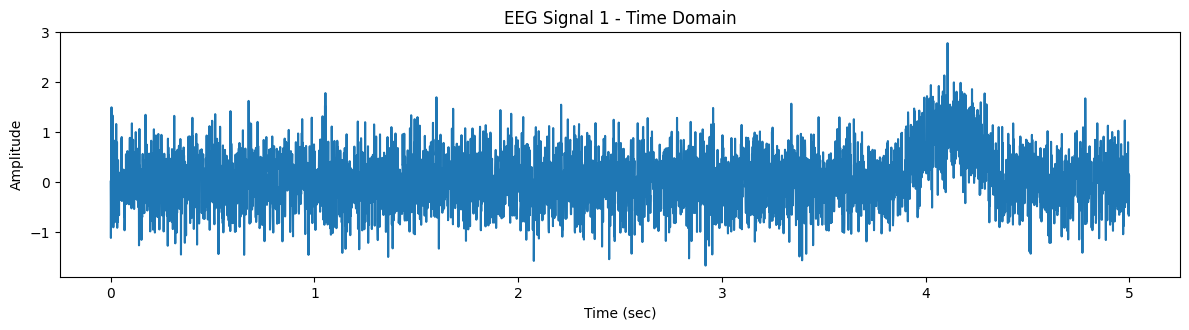

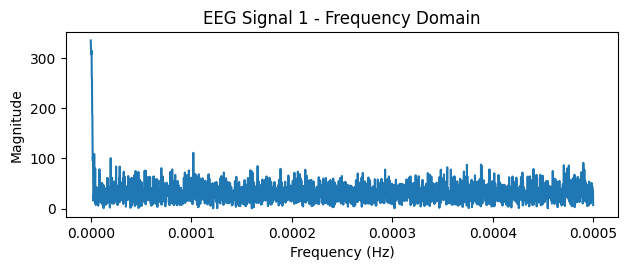

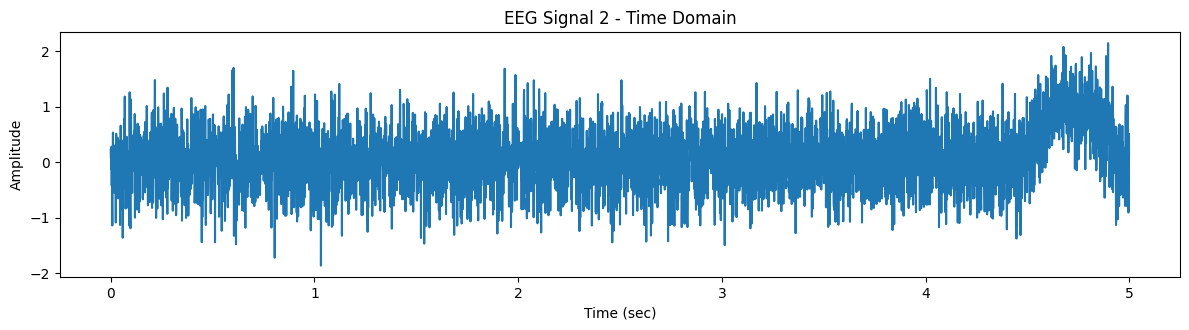

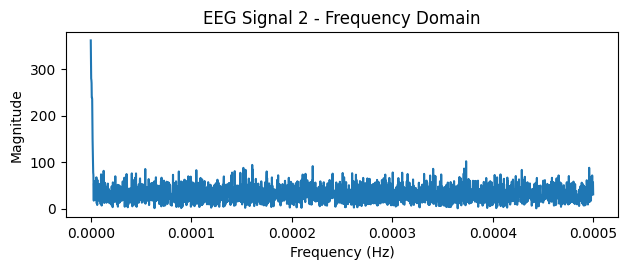

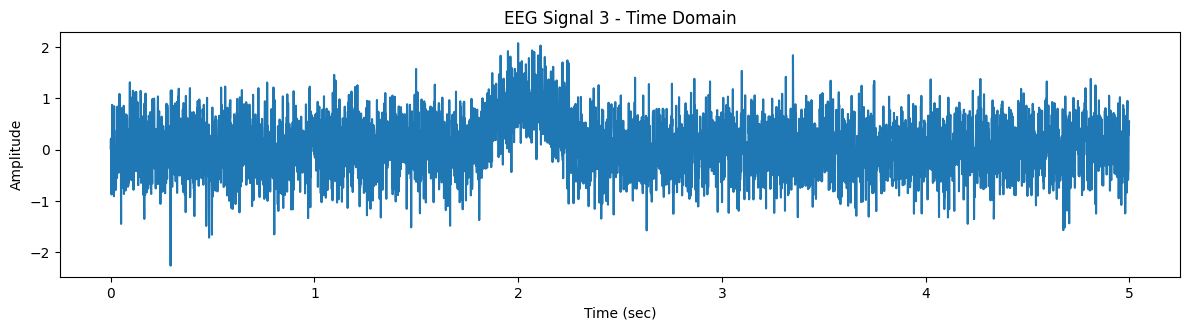

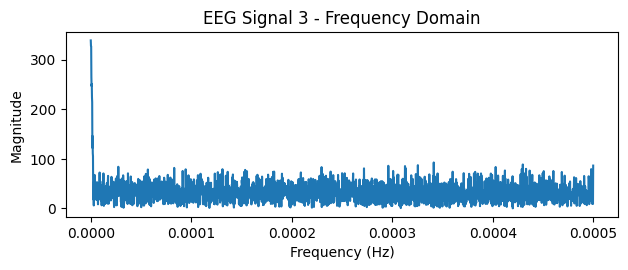

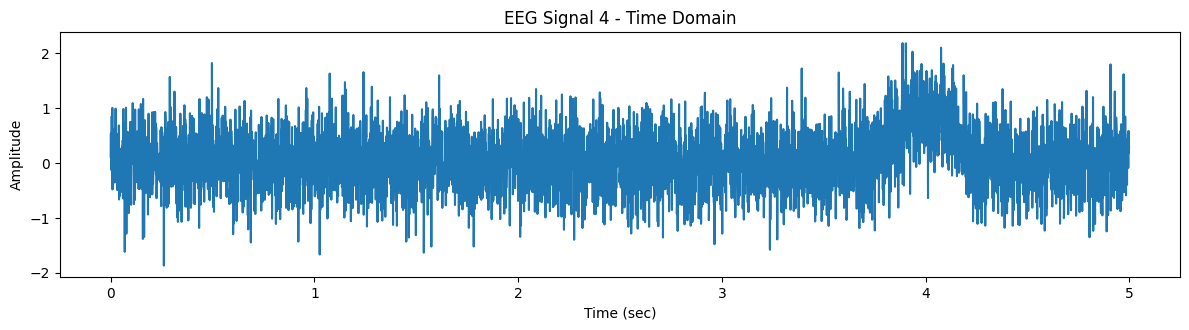

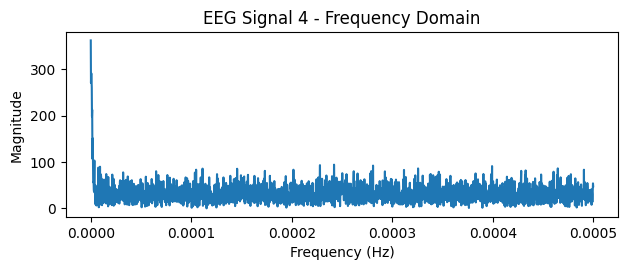

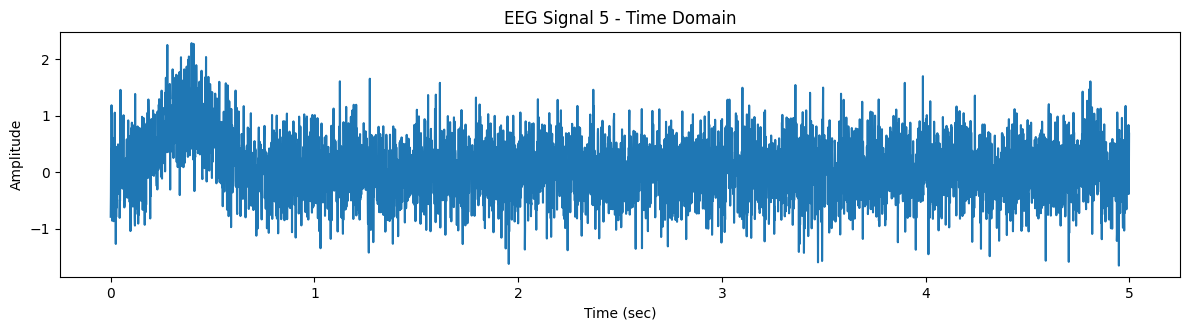

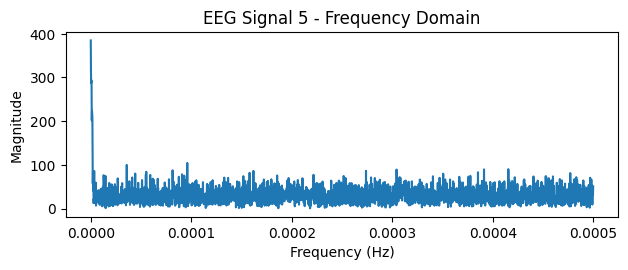

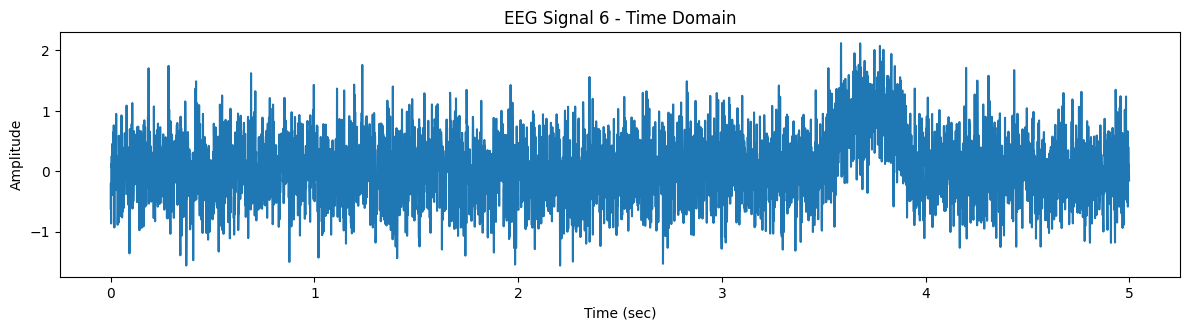

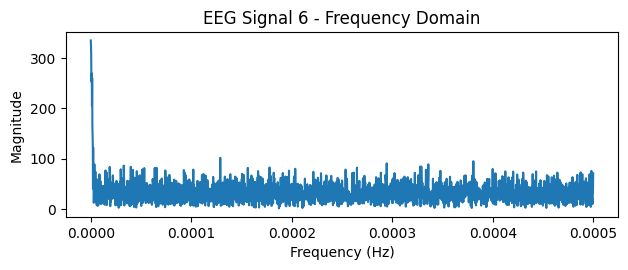

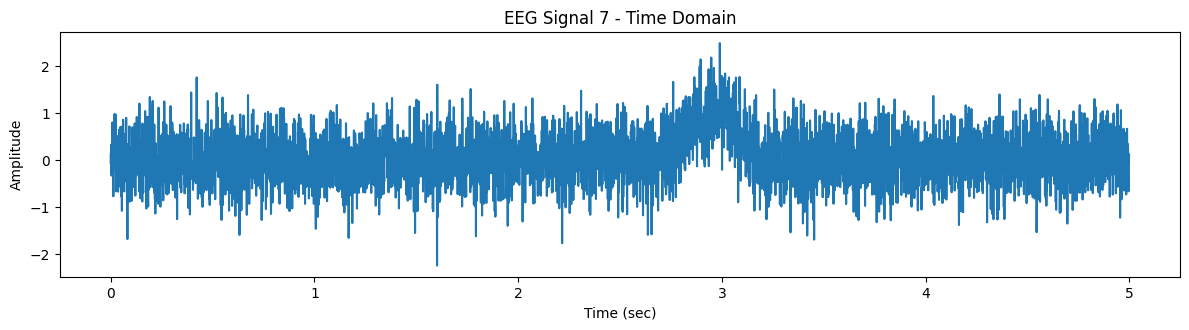

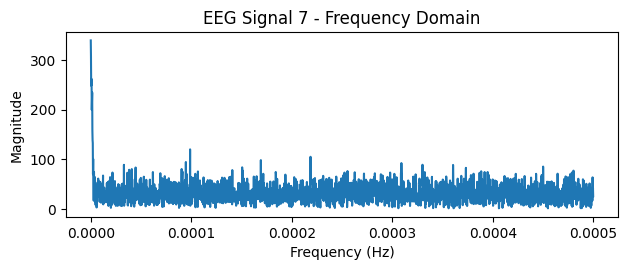

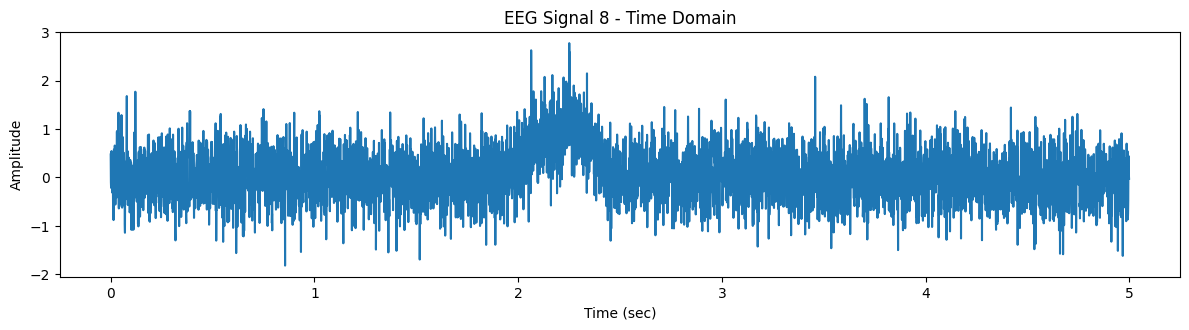

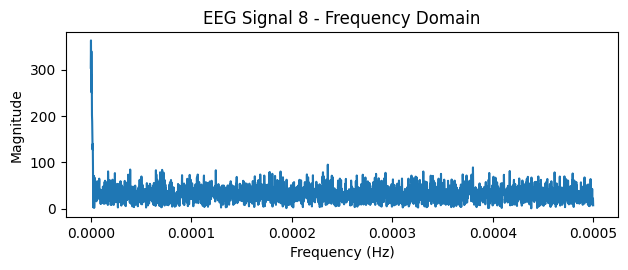

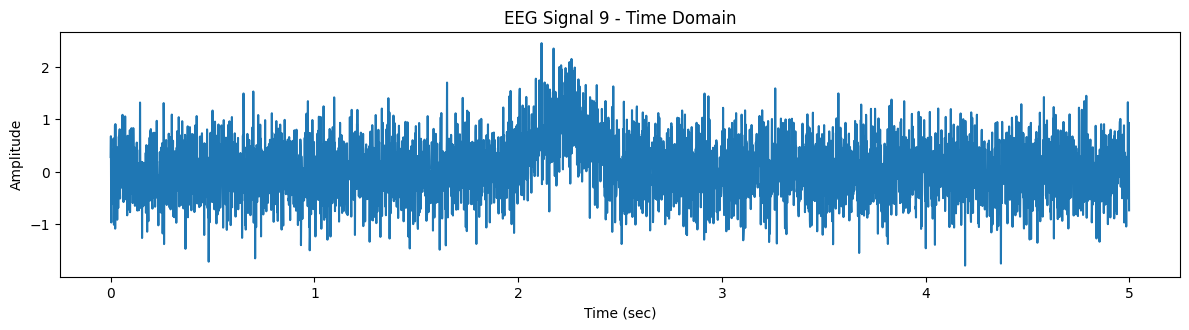

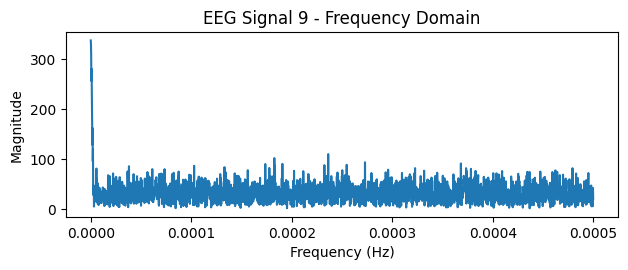

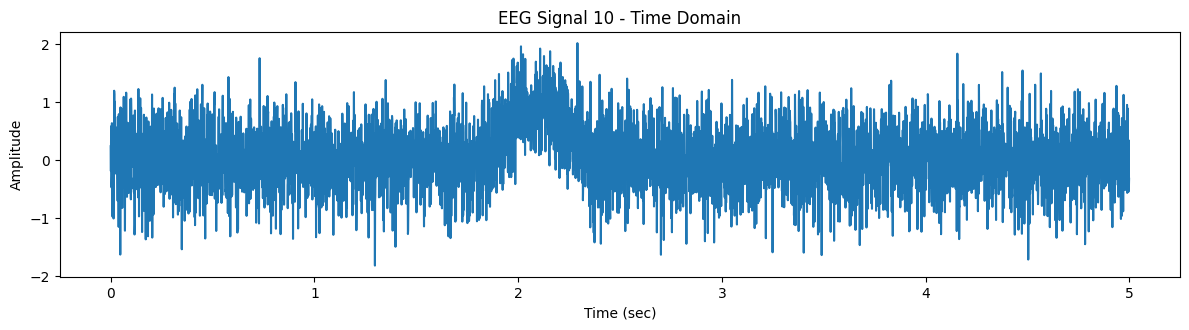

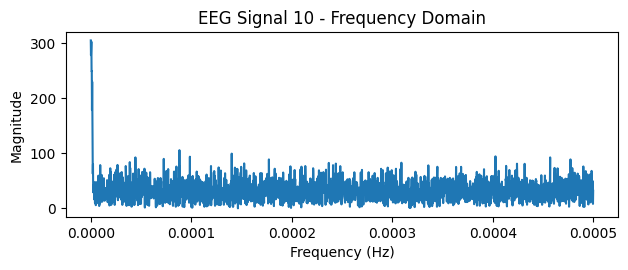

In [86]:
# create visualizations for all the recordings in both the time and frequency domains

import matplotlib.pyplot as plt
import numpy as np

sampling_rate = 1000  ## assuming 1 kHz sampling rate


def visualize_eeg(eeg_data):

  for i, signal in enumerate(eeg_data):

      time = np.arange(len(signal)) / sampling_rate

      # Time domain visualization
      plt.figure(figsize=(12, 6))
      plt.subplot(2, 1, 1)
      plt.plot(time, signal)
      plt.title(f"EEG Signal {i+1} - Time Domain")
      plt.xlabel("Time (sec)")
      plt.ylabel("Amplitude")
      plt.tight_layout()
      plt.show()


      # Frequency domain visualization (using FFT)

      frequencies = np.fft.fftfreq(len(signal), d=sampling_rate)
      spectrum = np.abs(np.fft.fft(signal))

      plt.subplot(2, 1, 2)
      plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(frequencies)//2])
      plt.title(f"EEG Signal {i+1} - Frequency Domain")
      plt.xlabel("Frequency (Hz)")
      plt.ylabel("Magnitude")
      plt.tight_layout()
      plt.show()



visualize_eeg(eeg_data)

In the time domain, the EEG signals show change in spike amplitude at specific time points, which may reflect event-related potentials (ERPs) or neural responses to stimuli.

In the frequency domain, all signals show high power around zero, maybe due to the DC component or baseline drift. Removing this low-frequency noise can help focus on meaningful brainwave activity.

Together, the time and frequency domain visualizations help identify both temporal and spectral patterns in the EEG data, providing insights into brain activity and potential noise sources.


### Creating ERP Template

Write a script to average the 10 EEG recordings, aligning them based on the known timestamps of the Event-Related Potentials (ERP). This will create an idealized template of the ERP. Plot the resulting averaged ERP and discuss its characteristics. How does averaging help in identifying the features of the ERP? Discuss any potential issues that might arise from this method.


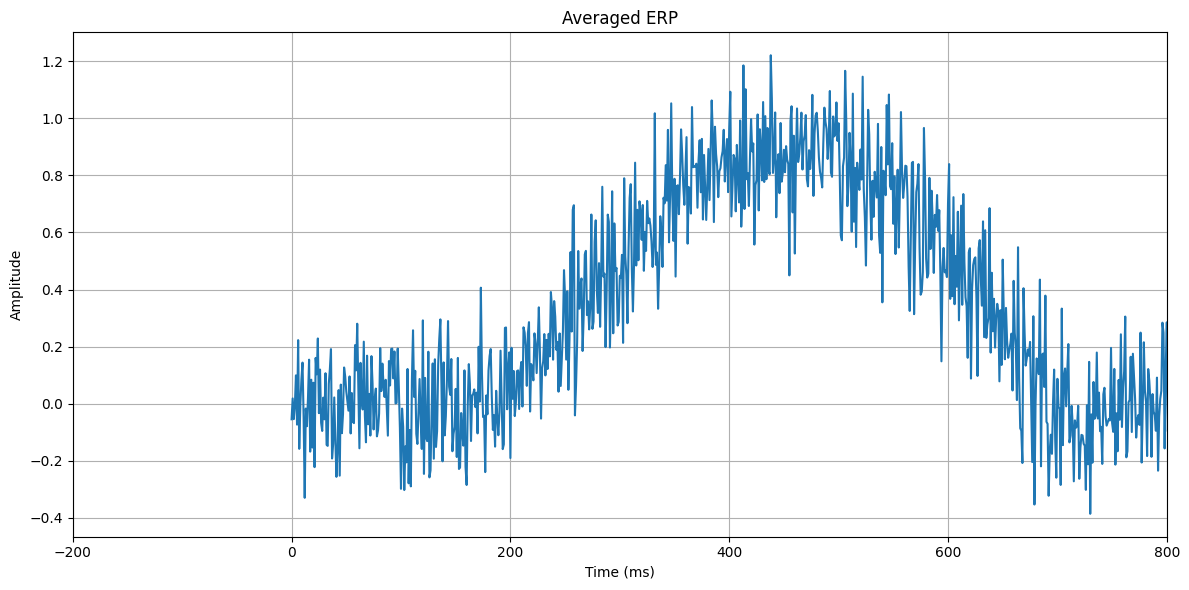

In [87]:
path_timestamps = "erp_timestamps.txt"

try:
    with open(path_timestamps, 'r') as f:
        timestamps = [float(line.strip("\n")) for line in f]
except FileNotFoundError:
    print(f"Error: File not found at {path_timestamps}")
    timestamps = None # Handle the case where the file is not found


    import numpy as np

def average_eeg(eeg_data, timestamps, time_window=(-0.2, 0.8), sampling_rate=1000):

    # time window in samples (convert to integers)
    start_sample = int(time_window[0] * sampling_rate)
    end_sample = int(time_window[1] * sampling_rate)
    epoch_length = end_sample - start_sample

    aligned_epochs = []

    for i, signal in enumerate(eeg_data):
        # align the signal around the ERP timestamp
        event_timestamp = timestamps[i]

        # convert ERP timestamp to sample index (round to nearest integer)
        event_sample = int(event_timestamp * sampling_rate)

        # extract epoch centered on the event
        epoch = signal[event_sample + start_sample : event_sample + end_sample]

        # ensure all epochs are the same length
        if len(epoch) != epoch_length:
            # if the epoch is shorter than expected, pad with zeros
            if len(epoch) < epoch_length:
                padding = epoch_length - len(epoch)
                epoch = np.pad(epoch, (0, padding), mode='constant')
            # if the epoch is longer than expected, trim
            elif len(epoch) > epoch_length:
                epoch = epoch[:epoch_length]

        aligned_epochs.append(epoch)

    # convert list of epochs to numpy array
    aligned_epochs = np.array(aligned_epochs)

    # average all aligned epochs
    averaged_erp = np.mean(aligned_epochs, axis=0)

    return averaged_erp



def plot_averaged_erp(averaged_erp, sampling_rate=1000, time_window=(-0.2, 0.8)):

    time = np.arange(len(averaged_erp)) * 1000 / sampling_rate

    plt.figure(figsize=(12, 6))
    plt.plot(time, averaged_erp)
    plt.title("Averaged ERP")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    time_window_ms = (time_window[0]*1000, time_window[1]*1000)
    plt.xlim(time_window_ms)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


averaged_erp = average_eeg(eeg_data, timestamps)
plot_averaged_erp(averaged_erp)

Averaging multiple EEG recordings aligned to Event-Related Potentials (ERP) timestamps helps isolate the brain's response to a specific event by reducing the influence of background noise. In individual EEG signals, noise from random brain activity, muscle artifacts, and other sources can obscure the ERP. By averaging across trials, these fluctuations are minimized, enhancing the signal-to-noise ratio and revealing clearer ERP components, such as N400 and P300, that may be difficult to detect in single trials. This also improves the temporal precision of ERP components.

However, averaging can mask individual variability, potentially masking unique responses across trials. Additionally, if artifacts are not properly addressed, they can distort the averaged ERP. Finally, improper cropping or alignment of epochs can lead to inaccurate results.

Despite these potential issues, averaging is a valuable method for obtaining a clearer, more reliable representation of event-related brain activity, provided that proper preprocessing and artifact rejection are performed.

<a id="question-8"></a>
### Matched Filter Convolution

Use the ERP template created in the previous question to perform a matched filter convolution with the new EEG recording (the one where the ERP location is unknown). Write a script that implements this convolution and identify where in the recording the ERP is most likely to occur. Provide a plot showing the convolution output and indicate the location of the ERP. Discuss how the matched filter approach helps in detecting the ERP and any limitations or challenges of this method.

**Use your convolution function from the previous steps**

The ERP is most likely to occur at 1.005 seconds.


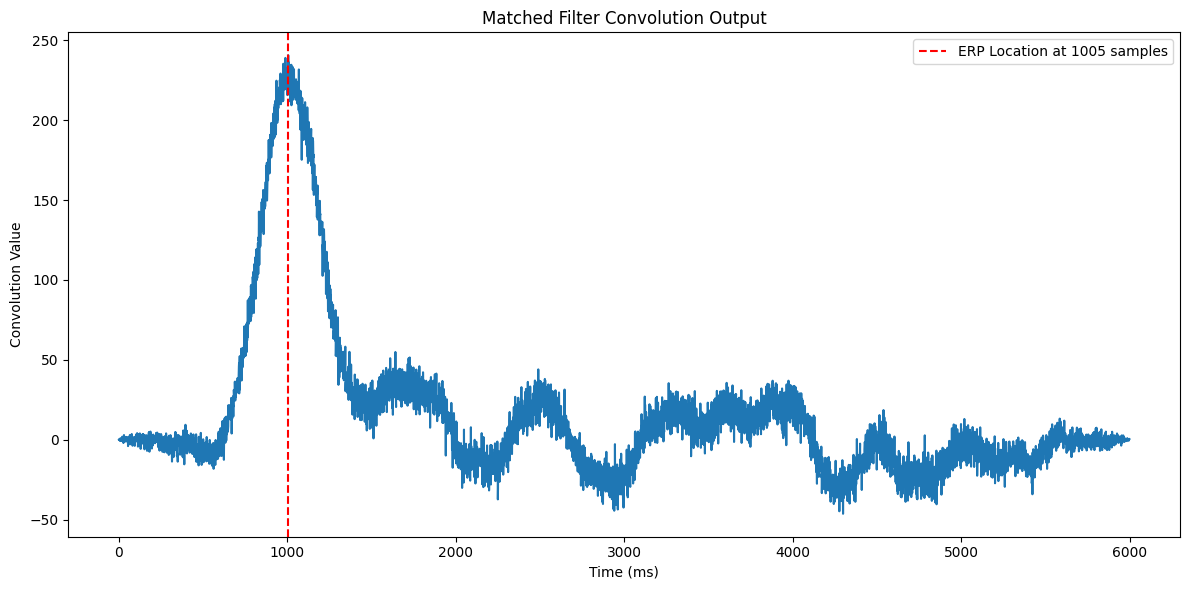

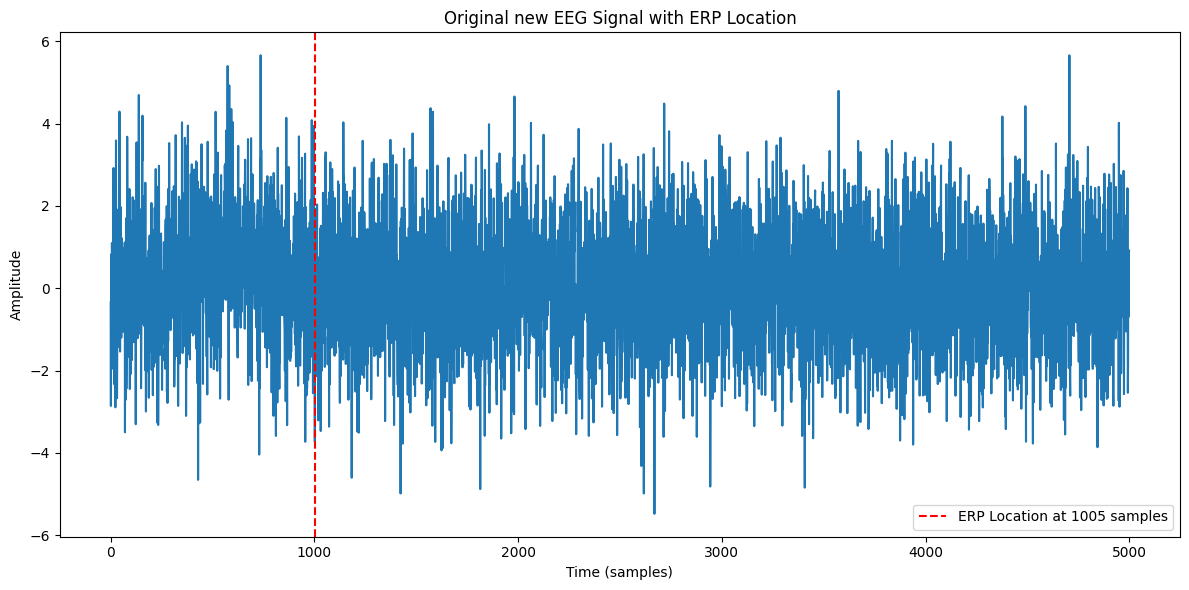

In [88]:
new_signal_path = "eeg_signal_to_analyze.pkl"

# load the data from the pickle file
with open(new_signal_path, 'rb') as f:
  new_signal = pickle.load(f)

# matched filter convolution using manual_convolution
matched_filter_convolution = manual_convolution(averaged_erp, new_signal)

# Identify the location of the maximum value in the convolution result
erp_location = np.argmax(matched_filter_convolution)

erp_location_seconds = erp_location / sampling_rate
print(f"The ERP is most likely to occur at {erp_location_seconds:.3f} seconds.")


# plot the convolution result
plt.figure(figsize=(12, 6))
plt.plot(matched_filter_convolution)
plt.title("Matched Filter Convolution Output")
plt.xlabel("Time (ms)")
plt.ylabel("Convolution Value")
plt.axvline(x=erp_location, color='r', linestyle='--', label=f"ERP Location at {erp_location} samples")
plt.legend()
plt.tight_layout()
plt.show()


# mark ERP location on the original signal

plt.figure(figsize=(12, 6))
plt.plot(new_signal)
plt.title("Original new EEG Signal with ERP Location")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.axvline(x=erp_location, color='r', linestyle='--', label=f"ERP Location at {erp_location} samples")
plt.legend()
plt.tight_layout()
plt.show()

The matched filter works by maximizing the correlation between the ERP template and the new signal, essentially searching for a segment of the EEG signal that most closely matches the ERP pattern. The position with the highest correlation indicates the most likely occurrence of the ERP. This method is more effective than manually searching for the ERP in a noisy signal by leveraging prior knowledge.

Challenges include:

Signal Noise: If the new EEG signal contains a lot of noise or artifacts that are similar to the ERP template, it can reduce the accuracy of detection.
ERP Variability: If the ERP varies across trials or subjects, a fixed template may not match perfectly.
Temporal Resolution: The resolution of the ERP detection depends on the length of the template and the signal. If the ERP is very short, the matched filter may not localize it with high precision.

## Part 2: Poisson Spike Trains

In this question we'll create and work with a spike train. The idea is to create a set of functions that can be used for your spike train analysis pipeline. These function should be reusable. The functions or modules you should define are:

- `readPoiSpikes`
- `generatePoiSpikes`
- `calcFF`
- `calcCV`
- `alcRate`

In this week's directory in the GitRepo,  there are two spiketrain datasets named `rawSpikes1.mat` and `rawSpikes2.mat`. They both should be placed into 1 ms bins. The spike times there are in milliseconds.

**Write each function inside a jupyter code cell or python file. Upload a PDF to your gitrepo of the outputs of each of your functions for both the provided spike trains and the one you generate.

Use the following parameters to test out your code:

```python
r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds
```

In [89]:
# set parameters

r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds

#### Load Data

Write a function that loads a dataset in the format of the spike train files in this gitrepo and outputs it as a spike train with a set binwidth. The function has to be able to read both column and row vectors, and should be robust to empty datasets.

```python
def readPoiSpikes(fileName, Fs):

    # your code here
    
    return spikeTrain
```

In [90]:
import numpy as np
from scipy.io import loadmat

def readPoiSpikes(fileName, Fs):
    """
    Reads a spike train dataset from a .mat file and returns a spike train with a given binwidth.

    Parameters:
    - fileName (str): Path to the .mat file containing the spike times.
    - Fs (float): The sampling frequency or bin width

    Returns:
    - spikeTrain (np.ndarray): A binary array representing the spike train (1 for spike, 0 for no spike).
    """

    try:
        mat_data = loadmat(fileName)
        spike_times_key = 'spikes'

        if spike_times_key in mat_data:
            spike_times = mat_data[spike_times_key].flatten()
        else:
            print(f"Error: Key '{spike_times_key}' not found in the .mat file.")
            return np.array([])  # account for empty dataset

        # convert spike times from seconds to samples (based on sampling frequency Fs)
        spike_bins = np.floor(spike_times * Fs).astype(int)

        # create the binary spike train (initialize with zeros)
        max_bin = spike_bins.max() + 1  # Get the size of the spike train array
        spikeTrain = np.zeros(max_bin, dtype=int)

        # set 1 in the corresponding bins for spike times
        spikeTrain[spike_bins] = 1

        return spikeTrain

    except Exception as e:
        print(f"Error reading spike data from {fileName}: {e}")
        return np.array([])  # return an empty array if there's an error


raw_1_path = "rawSpikes1.mat"
raw_2_path = "rawSpikes2.mat"

spikeTrain_1 = readPoiSpikes(raw_1_path, Fs)
spikeTrain_2 = readPoiSpikes(raw_2_path, Fs)

#### Generate Spike Trains

Write a function that generates a spike train, according to the Poisson process model and the explanation that was given in the exercise, under the "Poisson Generator" section. This function should run only if we didn't load a spike train earlier (don't just comment out the previous function). Here we assume $r(t)=r$ and
$P(\text{spike occurred}) = r\Delta t$ for short $\Delta t$. That means that we're considering a homogeneous process in this case. Make sure all operations are done in a vectorized manner, no loops!

```python
def generatePoiSpikes(r, dt, totalSize):

    # your code here

    return spikeTrain
```

In [109]:
import numpy as np

def generatePoiSpikes(r, dt, totalSize):

    """
    Generates a spike train using a Poisson process.

    Parameters:
    - r (float): The firing rate in Hz (spikes per second).
    - dt (float): The time step or bin size in seconds (e.g., 0.001 for 1 ms).
    - totalSize (int): The total duration of the spike train in samples.

    Returns:
    - spikeTrain (np.ndarray): Binary array where 1 indicates a spike and 0 indicates no spike.
    """
    
    # Calculate the probability of a spike in each time step
    p = r * dt  # Probability of a spike in each time step

    # Generate the spike train using vectorized random number generation
    spikeTrain = np.random.rand(totalSize) < p

    return spikeTrain.astype(int)


# total time in seconds * Fs in Hz = total samples
totalSize = int(totalTime * Fs)

# Generate the spike train
spikeTrain_generated = generatePoiSpikes(r, dt, totalSize)

# Print the first few values of the spike train
print("Generated spike train:", spikeTrain_generated)
len(spikeTrain_generated)

Generated spike train: [0 0 0 ... 0 0 0]


30000

#### Fano Factor and Coefficient of Variation

After we have a spike train at hand, we want to check whether the spikes are indeed Poisson-distributed. The two ways to check it were discussed in class: the Fano Factor and Coefficient of Variation. Write two functions that check these parameters for the spike trains.

Calculate the CV and FF of the two given spike trains and the one you generated. Consider carefully how to calculate the FF of a **single** spike train.

```python
def calcCV(spikeTrain):

    # your code here
    
    return CV
```


```python
def calcFF(spikeTrain):

    # your code here
    
    return FF
```

In [110]:
import numpy as np
from scipy.stats import variation


def calcCV(spikeTrain):
    """
    Calculate the Coefficient of Variation (CV) for a spike train.

    Parameters:
    - spikeTrain (np.ndarray): Binary array of spike occurrences (1 for spike, 0 for no spike).

    Returns:
    - CV (float): The Coefficient of Variation of inter-spike intervals (ISI).
    """

    #find the indices where spikes occur
    spike_indices = np.where(spikeTrain == 1)[0]

    # calculate the inter-spike intervals
    isis = np.diff(spike_indices)

    # if there are fewer than 2 spikes, CV is undefined
    if len(isis) < 2:
        return np.nan

    # mean and standard deviation of ISIs
    mean_isi = np.mean(isis)
    std_isi = np.std(isis)

    # coefficient of Variation CV
    CV = std_isi / mean_isi

    return CV


# calculating CV of the given and generated signals

CV_1 = calcCV(spikeTrain_1)
CV_2 = calcCV(spikeTrain_2)
CV_gen = calcCV(spikeTrain_generated)

print(f"CV for spike train 1: {CV_1}")
print(f"CV for spike train 2: {CV_2}")
print(f"CV for generated spike train: {CV_gen}")


# testing myself - calculating CV using scipy.stats.variation

def test_CV(spikeTrain):
  manual_cv = calcCV(spikeTrain)
  spike_indices = np.where(spikeTrain == 1)[0]
  isi = np.diff(spike_indices)
  scipy_cv = variation(isi)
  if np.array_equal(scipy_cv, manual_cv):
    print("\nBoth methods give the same result!")
  else:
    print("\nThe results are different.")


test_CV(spikeTrain_1)

CV for spike train 1: 0.7568141660477913
CV for spike train 2: 0.7251158944110898
CV for generated spike train: 0.9317498278864474

Both methods give the same result!


In [113]:
import numpy as np

# change binSize from seconds to ms
binSize_ = binSize * 1000

def calcFF(spikeTrain, binSize=binSize_):
    """
    Calculate the Fano Factor for the spike train.

    Parameters:
    - spikeTrain (np.ndarray): Binary spike train.
    - binSize (int): Size of the time bins for counting spikes (in ms).

    Returns:
    - fano_factor (float): The Fano Factor of the spike train.
    """
    
    binSize = int(binSize)  # ensure bin_size is an integer

    # count the number of spikes in each bin (binSize is in ms)
    spike_counts = np.array([np.sum(spikeTrain[i:i+binSize]) for i in range(0, len(spikeTrain), binSize)])

    # calculate the mean and variance of the spike counts
    mean_count = np.mean(spike_counts)
    var_count = np.var(spike_counts)

    # Fano Factor is variance / mean
    fano_factor = var_count / mean_count if mean_count != 0 else np.nan
    return fano_factor




# calculate FF of given and generated spike trains
FF_1 = calcFF(spikeTrain_1, binSize_)
FF_2 = calcFF(spikeTrain_2, binSize_)
FF_gen = calcFF(spikeTrain_generated, binSize_)

print(f"FF for spike train 1: {FF_1}")
print(f"FF for spike train 2: {FF_2}")
print(f"FF for generated spike train: {FF_gen}")


# I wanted to test myself here as well but couldn't find any library
# which has a built-in function for calculating this

FF for spike train 1: 0.5858521560574946
FF for spike train 2: 0.6189830508474576
FF for generated spike train: 0.9061662465490338


#### Rate of fire

Lastly we'll check the rate of fire of our neurons. The function should receive a spike train and length of the window in which it should calculate the rate. Length = 0 means that it should just return the average rate of fire of the whole train. A different window requires you to calculate the firing rate in that window, and plot the results over time - $r(t)$. Make sure the function is robust for all types of inputs. Calculate the rate of fire for the two given spike trains and the one you generated

```Python
def calcRate(spikeTrain, window, dt):

    # your code here
    
    return rateOfFire
```

Average Firing Rate for spike train 1: 487.0 Hz
Windowed Firing Rate for spike train 1:


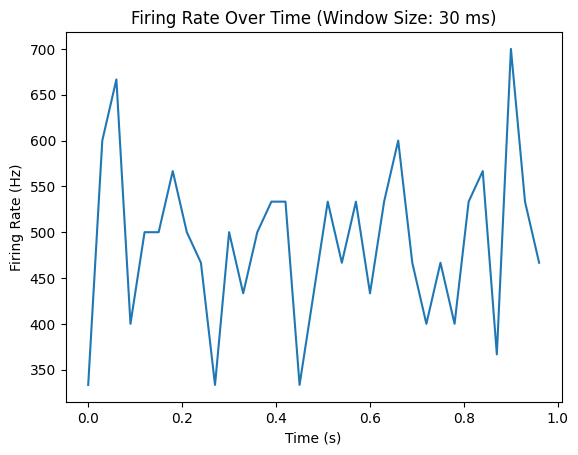

Average Firing Rate for spike train 2: 472.0 Hz
Windowed Firing Rate for spike train 2:


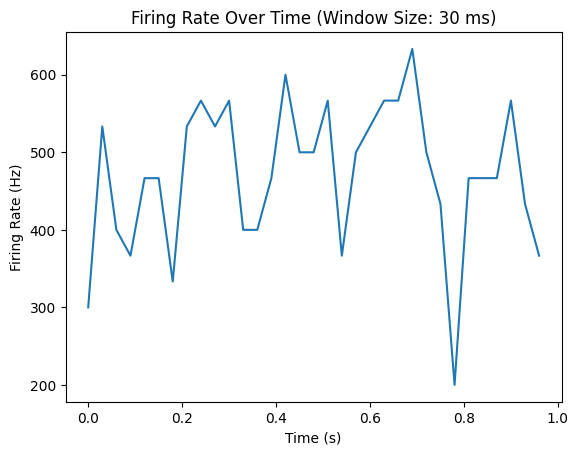

Average Firing Rate for generated spike train: 92.56666666666666 Hz
Windowed Firing Rate for generated spike train:


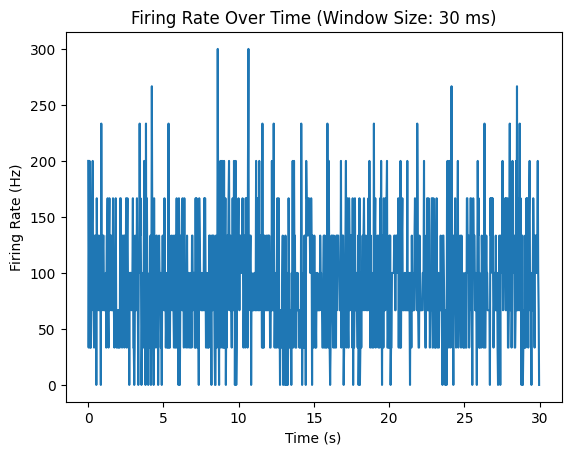

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def calcRate(spikeTrain, window, dt):
    """
    Calculate the firing rate of a spike train.

    Parameters:
    - spikeTrain (np.ndarray): Binary spike train.
    - window (int): Size of the moving window in milliseconds (0 means average over entire train).
    - dt (int): Size of time bins for the spike train (in ms).

    Returns:
    - firing_rate (np.ndarray or float): The firing rate of the spike train.
    """
    # ensure the input is a numpy array
    spikeTrain = np.asarray(spikeTrain)

    # case 1: calculate average firing rate over the entire spike train
    if window == 0:
        total_spikes = np.sum(spikeTrain)
        total_time = len(spikeTrain) * dt / 1000  # convert back to seconds
        firing_rate = total_spikes / total_time  # firing rate in Hz (spikes per second)
        return firing_rate

    # case 2: calculate firing rate in moving windows
    num_windows = len(spikeTrain) // window
    firing_rate = np.zeros(num_windows)

    for i in range(num_windows):
        start_idx = i * window
        end_idx = start_idx + window
        firing_rate[i] = np.sum(spikeTrain[start_idx:end_idx]) / (window * dt / 1000)  # Hz

    # plot the firing rate as a function of time
    time_points = np.arange(0, num_windows) * window / 1000  # time in seconds
    plt.plot(time_points, firing_rate)
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title(f'Firing Rate Over Time (Window Size: {window} ms)')
    plt.show()

    return firing_rate


# change dt from seconds to ms
dt_ = dt * 1000

# calculate and print the average rate of fire (over the entire train)
firing_rate_avg_1 = calcRate(spikeTrain_1, window = 0, dt=dt_)
firing_rate_avg_2 = calcRate(spikeTrain_2, window = 0, dt=dt_)
firing_rate_avg_gen = calcRate(spikeTrain_generated, window = 0, dt=dt_)

# calculate and plot the rate of fire with a window size of 50 ms
print(f"Average Firing Rate for spike train 1: {firing_rate_avg_1} Hz")
print(f"Windowed Firing Rate for spike train 1:")
firing_rate_windowed_1 = calcRate(spikeTrain_1, window=30, dt=dt_)
print(f"Average Firing Rate for spike train 2: {firing_rate_avg_2} Hz")
print(f"Windowed Firing Rate for spike train 2:")
firing_rate_windowed_2 = calcRate(spikeTrain_2, window=30, dt=dt_)
print(f"Average Firing Rate for generated spike train: {firing_rate_avg_gen} Hz")
print(f"Windowed Firing Rate for generated spike train:")
firing_rate_windowed_gen = calcRate(spikeTrain_generated,  window=30, dt=dt_)